<a href="https://colab.research.google.com/github/kapilnchauhan77/Dimensionality-Reduction/blob/master/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curse of Dimensionality

##You might have heard about it from a data scientist or read somewhere but what is it?

When there so many features that it start worsening the performance of a Machine Learning Algorithm, it is known as the Curse of Dimensionality!

It usually happens when number of features exceed 15 for some common algorithms or even less or more than that for other algorithms

###For instance, here is performance of a model with dataset consisting of 18 features!

#### Getting the dataset

In [0]:
!mkdir data

import urllib
import requests
import bs4 as bs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/vehicle/"

try:
    page_source = urllib.request.urlopen(URL).read()
except:
    page_source = requests.get(URL)

soup = bs.BeautifulSoup(page_source, "lxml")
for url in soup.find_all("a"):
    file_to_get = str(url.get("href"))
    if file_to_get.endswith(".dat"):
      full_url = URL + file_to_get
      urllib.request.urlretrieve(str(full_url), f"/content/data/{file_to_get.split('.')[0]}.csv")


mkdir: cannot create directory ‘data’: File exists


In [0]:
import pandas as pd
import os

list_columns = ["COMPACTNESS", "CIRCULARITY", "DISTANCE CIRCULARITY", "RADIUS RATIO", "PR.AXIS ASPECT RATIO", "MAX.LENGTH ASPECT RATIO", "SCATTER RATIO", "ELONGATEDNESS", "PR.AXIS RECTANGULARITY", "MAX.LENGTH RECTANGULARITY", "SCALED VARIANCE ALONG MAJOR AXIS", "SCALED VARIANCE ALONG MINOR AXIS", "SCALED RADIUS OF GYRATION", "SKEWNESS ABOUT MAJOR AXIS", "SKEWNESS ABOUT MINOR AXIS", "KURTOSIS ABOUT MAJOR AXIS", "KURTOSIS ABOUT MINOR AXIS", "HOLLOWS RATIO", "CLASSES"]

converter_dict = {"saab": 0, "opel": 1, "bus": 2, "van":3}

def converter_func(x):
  if str(x) != "":
    return converter_dict[str(x)]
  else:
    return x

converter = {"CLASSES": converter_func}

df1 = pd.read_csv("/content/data/xaa.csv", sep=' ', header=None, names=list_columns)
keys = df1.columns
values = df1.dtypes
data_types = dict(zip(keys[:-1], values[:-1]))
del([keys, values, df1])

dfs = []

for csv in os.listdir("/content/data"):
  dfs.append(pd.read_csv(f"/content/data/{csv}", sep=' ', header=None, names=list_columns, dtype=data_types, index_col=False, converters=converter))

del([csv, data_types])
df = pd.concat(dfs)
del(dfs)

#### Data

In [0]:
#@title First Few Rows of our Data

df.head()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,KURTOSIS ABOUT MINOR AXIS,HOLLOWS RATIO,CLASSES
0,104,51,108,193,59,11,217,31,24,163,232,694,203,72,15,22,190,201,0
1,87,37,60,132,57,6,128,52,18,129,154,243,132,71,1,14,186,192,0
2,82,36,54,117,53,7,125,54,18,126,146,229,128,78,1,5,180,184,0
3,105,56,98,209,64,11,217,31,24,173,225,696,216,72,2,19,188,199,1
4,80,39,60,122,56,6,139,49,18,131,151,281,142,80,0,5,179,186,1


#### As you can see the data is perfect except for the number of features

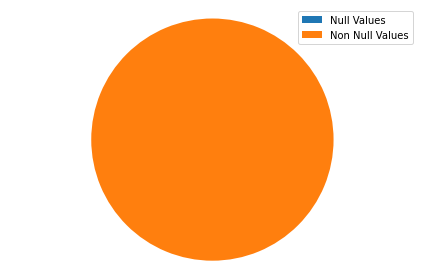

In [0]:
#@title There are no Null Values

total_values = len(df.columns) * len(df)
number_of_null_values = df.isna().sum().sum()
labels = ["Null Values", "Non Null Values"]
patches, texts = plt.pie([number_of_null_values, (total_values-number_of_null_values)])
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

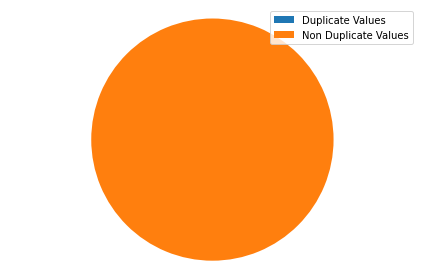

In [0]:
#@title There are no Duplicate values

total_values = len(df.columns) * len(df)
number_of_Duplicate_values = len([c for c in df.columns if len(df[c].drop_duplicates()) <= 2])  * len(df)
labels = ["Duplicate Values", "Non Duplicate Values"]
patches, texts = plt.pie([number_of_Duplicate_values, (total_values-number_of_Duplicate_values)])
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

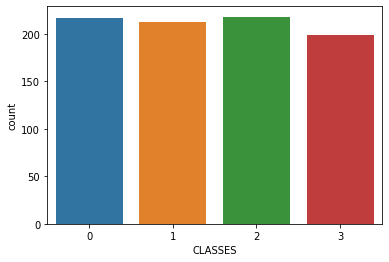

In [0]:
#@title Data is fully balanced

sns.countplot(df["CLASSES"])
plt.show()

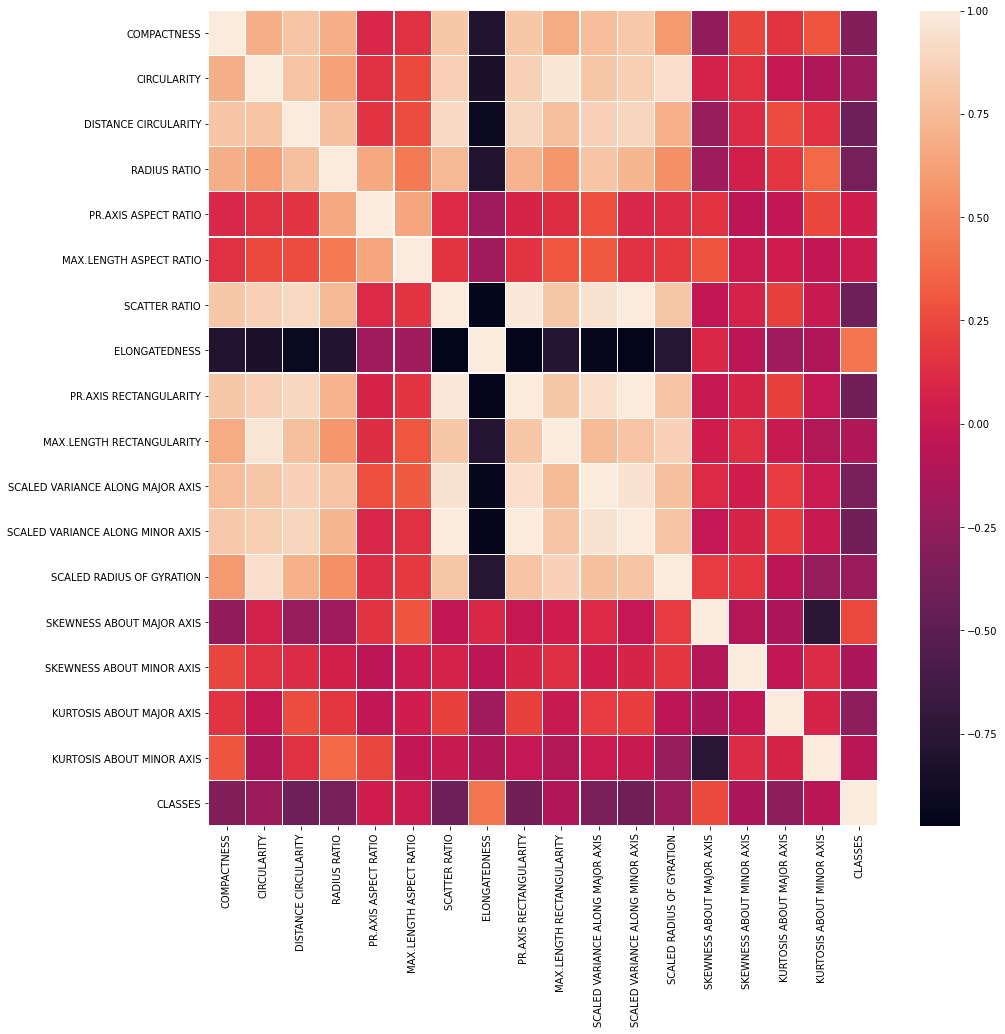

In [0]:
#@title The correlation chart also looks good
df_plot = df.copy()
df_corr = df_plot.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15,15))
axes = sns.heatmap(df_corr, linewidths=.2, )
plt.show()

#### But still the resulting Accuracy of the model is awful

#####Model in detail

In [0]:
x, y = np.array(df.drop(["CLASSES"], axis=1), dtype=np.float), np.array(df[["CLASSES"]], dtype=np.float)

In [0]:
X_train, y_train = x[:int(len(df) * 0.9)], y[:int(len(df) * 0.9)]
X_val, y_val =x[int(len(df) * 0.9):], y[int(len(df) * 0.9):]

In [0]:
from sklearn.svm import SVC

svc = SVC(random_state=0)
svc.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

# Machine Learning Model Accuracy without Dimensionality Reduction 

Accuracy on train data before performing Dimensionality Reduction : 51.38%
Accuracy on validation data before performing Dimensionality Reduction: 43.53%



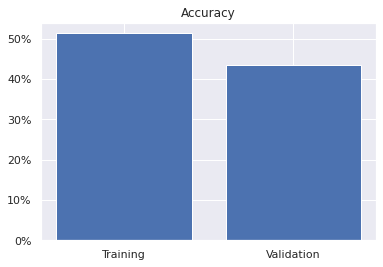

In [0]:
#@title Accuracy before performing Dimensionality Reduction 
fig = plt.figure()

training_data_accuracy_without_DR = round(svc.score(X_train, y_train), 4)*100
validation_data_accuracy_without_DR = round(svc.score(X_val, y_val), 4)*100

print("Accuracy on train data before performing Dimensionality Reduction : " + str(training_data_accuracy_without_DR) + '%')
print("Accuracy on validation data before performing Dimensionality Reduction: " + str(validation_data_accuracy_without_DR) + '%')
print("")

ax = fig.add_subplot(111)
plt.title("Accuracy")
accuracy_dictionary = {"Training": training_data_accuracy_without_DR, "Validation": validation_data_accuracy_without_DR}
keys = accuracy_dictionary.keys()
values = accuracy_dictionary.values()

ax.bar(keys, values)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

#### Performing Dimensionality Reduction

In [0]:
x, y = np.array(df.drop(["CLASSES"], axis=1), dtype=np.float), np.array(df[["CLASSES"]], dtype=np.float)

######Scaling the Data to ease Dimensionality Reduction


In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x) 

######We will be using Principal Component Analysis for the Dimensionality Reduction

In [0]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x)
x = pca.transform(x)

In [0]:
X_train, y_train = x[:int(len(df) * 0.9)], y[:int(len(df) * 0.9)]
X_val, y_val =x[int(len(df) * 0.9):], y[int(len(df) * 0.9):]

In [0]:
from sklearn.svm import SVC

svc = SVC(random_state=0)
svc.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

# Machine Learning Model Accuracy with Dimensionality Reduction 

Accuracy on train data after performing Dimensionality Reduction : 82.26%
Accuracy on validation data after performing Dimensionality Reduction: 78.82000000000001%



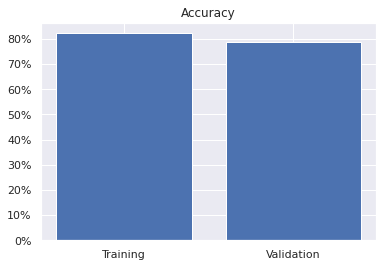

In [0]:
#@title Accuracy after performing Dimensionality Reduction 
fig = plt.figure()

training_data_accuracy_with_DR = round(svc.score(X_train, y_train), 4)*100
validation_data_accuracy_with_DR = round(svc.score(X_val, y_val), 4)*100

print("Accuracy on train data after performing Dimensionality Reduction : " + str(training_data_accuracy_with_DR) + '%')
print("Accuracy on validation data after performing Dimensionality Reduction: " + str(validation_data_accuracy_with_DR) + '%')
print("")

ax = fig.add_subplot(111)
plt.title("Accuracy")
accuracy_dictionary = {"Training": training_data_accuracy_with_DR, "Validation": validation_data_accuracy_with_DR}
keys = accuracy_dictionary.keys()
values = accuracy_dictionary.values()

ax.bar(keys, values)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

## We have Achieved a 41% Training Accuracy increase and a 35% Validation Accuracy Increase by elimination Curse of Dimensionality

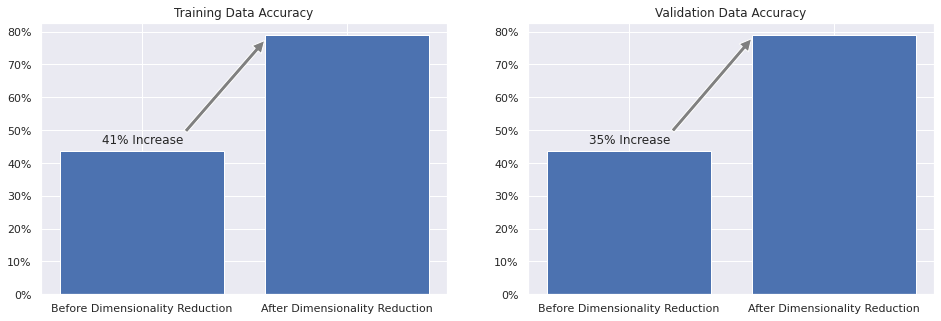

In [0]:
#@title Visualization of the Increase
fig = plt.figure(figsize=(16, 5))


ax1 = fig.add_subplot(121)
plt.title("Training Data Accuracy")
train_accuracy_dictionary = {"Before Diasdmensionality Reduction": training_data_accuracy_without_DR, "After Dimensionalisdty Reduction": training_data_accuracy_with_DR}
train_keys = validation_accuracy_dictionary.keys()
train_values = validation_accuracy_dictionary.values()
ax1.bar(validation_keys, validation_values)
ax1.annotate("41% Increase", (0.6, training_data_accuracy_with_DR-5),
                 xytext=(0.15, training_data_accuracy_without_DR/100+0.04), textcoords="axes fraction",
                 arrowprops=dict(facecolor="gray"))
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

ax2 = fig.add_subplot(122)
plt.title("Validation Data Accuracy")
validation_accuracy_dictionary = {"Before Dimensionality Reduction": validation_data_accuracy_without_DR, "After Dimensionality Reduction": validation_data_accuracy_with_DR}
validation_keys = validation_accuracy_dictionary.keys()
validation_values = validation_accuracy_dictionary.values()
ax2.bar(validation_keys, validation_values)
ax2.annotate("35% Increase", (0.6, validation_data_accuracy_with_DR-1),
                 xytext=(0.15, validation_data_accuracy_without_DR/100+0.12), textcoords="axes fraction",
                 arrowprops=dict(facecolor="gray"))
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())


plt.show()

#How it works?

##Basic Principle

While Performing Dimensionality Reduction, We perform some statistical analysis like calculating correlation between features and labels, their standard deviation, to name a few for getting theri statistical significance and then project the features to a lower dimension or to a lower number by combining them based on their statistical significance in a way that doesn't disturb their numberic relation, this decreases the number of features, inturn freeing us from the curse of dimensionality.

##Performing Dimensionality Reduction from Scratch

Note: There are many Dimension Redcution Algorithms, all with different techniques, we cannot show the workings of each and every algoritm. So, instead we are showcasing one of the most popular and widely used Dimension Reduction Algorithm, Principal Component Analysis(PCA).

###Producing Data

In [0]:
from math import pi
from math import sin

import matplotlib.pyplot as plt

import numpy as np

import math

def corr_vars( start=-10, stop=10, step=0.5, mu=0, sigma=3, func=lambda x: x ):
    x = np.arange(start, stop, step)    
    
    e = np.random.normal(mu, sigma, x.size)
    
    y = np.zeros(x.size)
    
    for ind in range(x.size):
        y[ind] = func(x[ind]) + e[ind]
    
    return (x,y)

In [0]:
np.random.seed(100)

(x1,x2) = corr_vars(start=2, stop=4, step=0.2, sigma=2, func=lambda x: 2*math.sin(x))

A = np.column_stack((x1,x2))

In [0]:
A

array([[ 2.        , -1.68093609],
       [ 2.2       ,  2.30235361],
       [ 2.4       ,  3.65699797],
       [ 2.6       ,  0.52613067],
       [ 2.8       ,  2.63261787],
       [ 3.        ,  1.3106777 ],
       [ 3.2       ,  0.32561105],
       [ 3.4       , -2.65116887],
       [ 3.6       , -1.26403255],
       [ 3.8       , -0.71371289]])

###Data

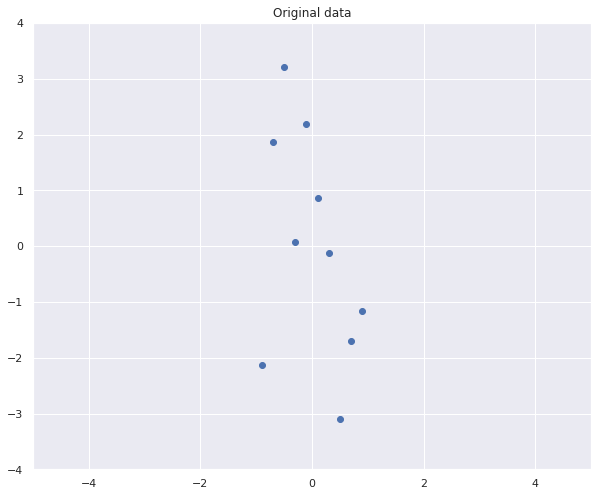

In [0]:
#@title Plotting the Data
f, ax = plt.subplots(figsize=(10,10))
ax.scatter(A[:,0], A[:,1])
ax.set_title("Original data")
ax.set_aspect('equal')
ax.grid(True)

plt.xlim([-5,5])
plt.ylim([-4,4])
plt.show()

As You can see, the data is not centralized, so first of all we centraize the data

###Centralizing the Data

We simply substract the Data point with it's mean for centralizing it

In [0]:
A = (A-np.mean(A,axis=0))

###Centered Data

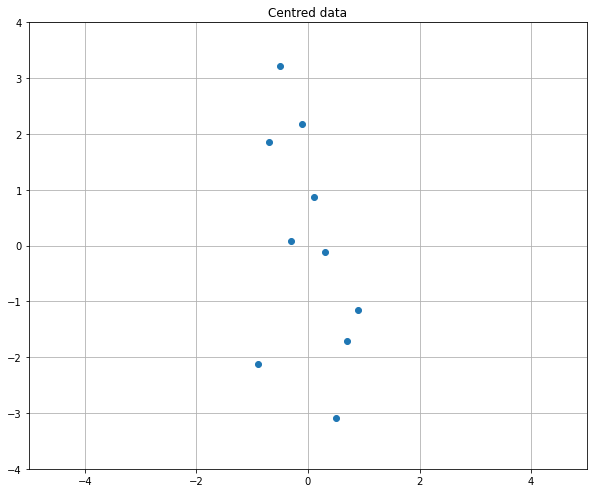

In [0]:
#@title Plotting Data after Centralizing it
f, ax = plt.subplots(figsize=(10,10))
ax.scatter(A[:,0], A[:,1])
ax.set_title("Centred data")
ax.set_aspect('equal')
ax.grid(True)

plt.xlim([-5,5])
plt.ylim([-4,4])
plt.show()

Now let's find a 1D line on which we can translate our 2D Data to

###Finding Lower dimensional plane to translate the data to

We perform this task by finding the Eigen Vectors to our Data points and translating our data point to that Vector

We do this as we simply want to translate the data to lower dimension without losing it's linear relation

Note: Eigen Vectors are vectors which when operated on given a scalar multiple of itself meaning that our data points when translated to it would not lose it's linear relation neccesary for performing Machine Learning

In [0]:
evecs, eigenvalues, V = np.linalg.svd(A.T, full_matrices=False)

In [0]:
evecs

array([[-0.14027773,  0.9901122 ],
       [ 0.9901122 ,  0.14027773]])

In [0]:
eigenvalues

array([6.19647908, 1.61106079])

In [0]:
x = []
y = []
for i in range (-4,4):
    x.append(i)
    y.append(evecs[1,1] * i / evecs[0,1])

###1 Dimensional plane (line) best suited to project our 2 Dimensional Data to

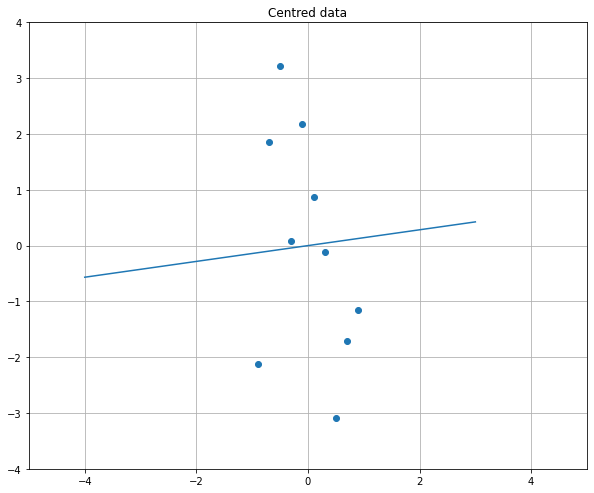

In [0]:
#@title Plotting the Eigen Vector to our Data
f, ax = plt.subplots(figsize=(10,10))
ax.scatter(A[:,0], A[:,1])
ax.set_title("Centred data")
ax.set_aspect('equal')
ax.grid(True)

plt.xlim([-5,5])
plt.ylim([-4,4])
ax.plot(x, y, linestyle='-')
plt.show()

###Now Let's project the Data to it

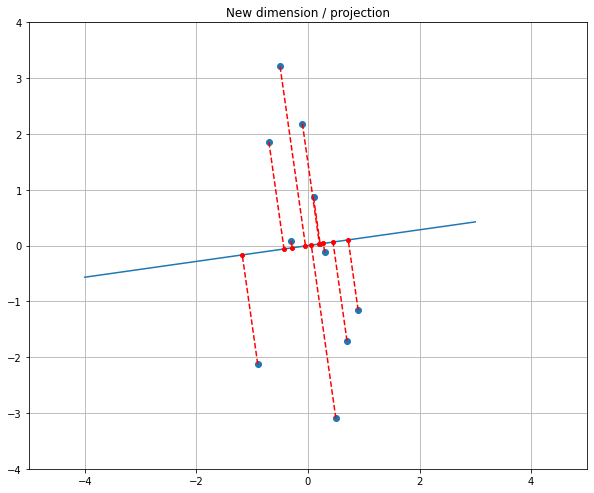

In [0]:
#@title Plotting the Projection
f, ax = plt.subplots(figsize=(10,10))
ax.scatter(A[:,0], A[:,1])
ax.set_title("New dimension / projection")
ax.set_aspect('equal')
ax.grid(True)

plt.xlim([-5,5])
plt.ylim([-4,4])
ax.plot(x, y, linestyle='-')

p0 = [x[0],y[0]]
p1 = [x[len(x)-1],y[len(x)-1]]

a = np.array([[p1[0]-p0[0], p1[1]-p0[1]],
              [p0[1]-p1[1], p1[0]-p0[0]]])

for i in range(0, len(A)):
    q  = A[i]    
    
    b = -np.array([-q[0]*(p1[0]-p0[0]) - q[1]*(p1[1]-p0[1]),
                   -p0[1]*(p1[0]-p0[0])+ p0[0]*(p1[1]-p0[1])])

    proj = np.linalg.solve(a,b)
    
    ax.plot(proj[0],proj[1], 'bo', markersize=4, color='red')
    ax.plot((q[0],proj[0]),(q[1],proj[1]), linestyle='--', color='red')

#Looking at some more examples of Dimensionality Reduction

## Dimensionality Reduction for Images: Hand-written digits

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions or even 18 dimesions (feautures), but it becomes much more clear when looking at high-dimensional data like images.
To see this, let's take a quick look at the application of PCA to images of different digits.

###Loading Data

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [0]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

###A hand written digit consists of 8X8 pixels or 64 dimensions, let's project it to 2 Dimensions so we can project it 

In [0]:
from sklearn.decomposition import PCA
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


###Let's plot our 2 Dimensional representation of 64 Dimensional image data 

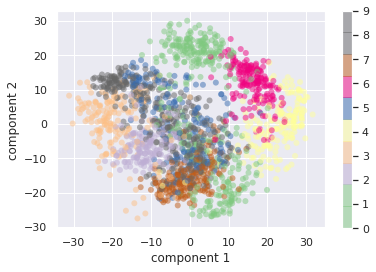

In [0]:
#@title Plotting the Data
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

As we can see, there is a clear spatial distinction between these digits in 2D space, making a machine learning algoritms task much more easier

## Dimensionality Reduction as Noise Filtering

Dimensionality Reduction can also be used as a filtering approach for noisy data.
The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise.
So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

Let's see how this looks with the images for digits.
First we will plot several of the input noise-free data:

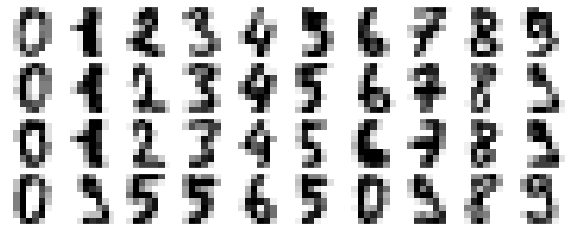

In [0]:
#@title Noise Free Data
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

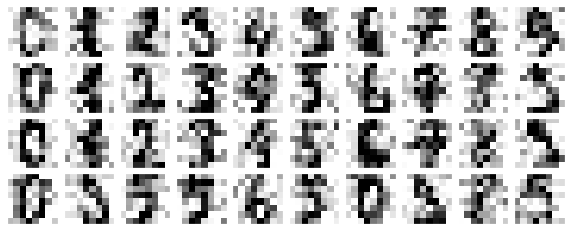

In [0]:
#@title Data with added Noise 
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

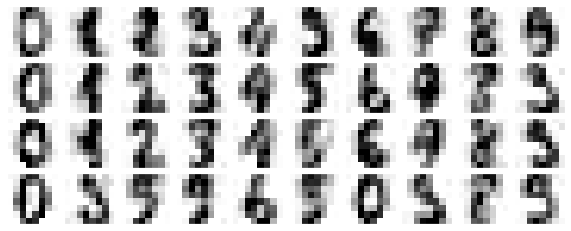

In [0]:
#@title Data after Dimensionality Reduction
pca = PCA(0.50).fit(noisy)
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

#Summary

Noise and large number of features are the most common occuring and stress inducing problems when dealing with real world data, for instance, data from IoT devices have this issue without fail. 

Although, there are many ways to deal with it, Dimensionality Reduction is one of the more successful and prominent ones.